# Minería de datos
# Práctica Visualización 

## Equipo 3 : 

- ### Ruy Aramis López Verduzco 1863861
- ### Ricardo González Berumen 1941497
- ### Thalia Ruiz Espitia 1941494
- ### José Claudio Gaytán Guitiérrez 1855455
- ### Nancy Janeth Rodríguez Pacheco 1845816
- ### Daisy Aideth Gonzalez Martinez 1748467

# Base de datos primaria
### Título de la base : The Bread Basket
### URL : https://www.kaggle.com/mittalvasu95/the-bread-basket

## Importando librerías

In [1]:
import numpy as np
import pandas as pd

## Abriendo base de datos

In [2]:
data = pd.read_csv("breadBasket.csv")

## Modificacion en el formato de la fecha
### Como la base de datos venia en formato de day/month/year y este formato no permite ordenar por fecha o agrupar ya sea por año o mes, por lo que se modifico y se agrego en columnas distintas:

In [3]:
#Rutina para cambiar formato de la fecha
year = []
month = []
day = []
cleanDate = []
for fecha in data["date_time"]:
    #print(fecha)
    #Para separar año
    for fechaseparada in fecha.split("-"):
        if len(fechaseparada)>2:
            yearTEMP = fechaseparada.split(" ")[0]
            year.append(yearTEMP)
    #Para separar dia
    dayTEMP = fecha.split("-")[0]
    day.append(dayTEMP)
    #Para separar mes
    monthTEMP = fecha.split("-")[1]
    month.append(monthTEMP)
    clean = yearTEMP + "-" + monthTEMP + "-" + dayTEMP
    cleanDate.append(clean)

#print(cleanDate)
#Agregamos las columnas a la base de datos
data_cleandate = data.assign(clean_date = cleanDate,year = year, month = month, day = day)
data_cleandate

,Transaction,Item,date_time,period_day,weekday_weekend,clean_date,year,month,day
0,1,Bread,30-10-2016 09:58,morning,weekend,2016-10-30,2016,10,30
1,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,2016,10,30
2,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,2016,10,30
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,2016-10-30,2016,10,30
4,3,Jam,30-10-2016 10:07,morning,weekend,2016-10-30,2016,10,30
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend,2017-04-09,2017,04,09
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend,2017-04-09,2017,04,09
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend,2017-04-09,2017,04,09
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend,2017-04-09,2017,04,09


### En la siguiente tabla, se agrupo para realizar un conteo de ventas por dia y de ahi crear una serie de tiempo denominada "serieVentas"

In [4]:
serieVentas = data_cleandate.groupby(by = "clean_date").size().reset_index(name='counts').sort_values(by = "clean_date", ascending=True)
print(serieVentas)

     clean_date  counts
0    2016-10-30     170
1    2016-10-31     199
2    2016-11-01     150
3    2016-11-02     164
4    2016-11-03     189
..          ...     ...
154  2017-04-05     143
155  2017-04-06     118
156  2017-04-07      99
157  2017-04-08     205
158  2017-04-09      69

[159 rows x 2 columns]


# Descripcion estadística básica
### Se usara la base de datos con la serie de tiempo de ventas diarias:

In [5]:
print("\t\tESTADISTICA BASICA DE LA SERIE DE VENTAS DIARIAS: \nSuma: ",serieVentas["counts"].sum(),
"\nPromedio: ",serieVentas["counts"].mean(),
"\nConteo: ",serieVentas["counts"].count(), 
"\nMinimo: ",serieVentas["counts"].min(),
"\nMaximo: ",serieVentas["counts"].max(),
"\nMedia: ",serieVentas["counts"].median(),
"\nVarianza: ",serieVentas["counts"].var(),
"\nDesviacion estandar: ",serieVentas["counts"].std(),
"\nSkewness: ",serieVentas["counts"].skew(),
"\nKurtosis: ",serieVentas["counts"].kurt())

print("\n\tSuma acumulada:\n",serieVentas["counts"].cumsum())

print("\tResumen: \n",serieVentas["counts"].describe())




		ESTADISTICA BASICA DE LA SERIE DE VENTAS DIARIAS: 
Suma:  20507 
Promedio:  128.9748427672956 
Conteo:  159 
Minimo:  1 
Maximo:  292 
Media:  118.0 
Varianza:  2028.2778441206908 
Desviacion estandar:  45.03640576378949 
Skewness:  0.8689889126550832 
Kurtosis:  1.3249945707062833

	Suma acumulada:
 0        170
1        369
2        519
3        683
4        872
       ...  
154    20016
155    20134
156    20233
157    20438
158    20507
Name: counts, Length: 159, dtype: int64
	Resumen: 
 count    159.000000
mean     128.974843
std       45.036406
min        1.000000
25%       99.000000
50%      118.000000
75%      151.000000
max      292.000000
Name: counts, dtype: float64


# Gráficas

### Para visualizar la informacion anterior, se graficará:

In [6]:
import pandas as pd
import matplotlib as plt

## Grafica de barras

### Con el siguiente grafico se puede ver cuales son los 15 productos mas vendidos y al mas vendido que es el cafe:

<AxesSubplot:>

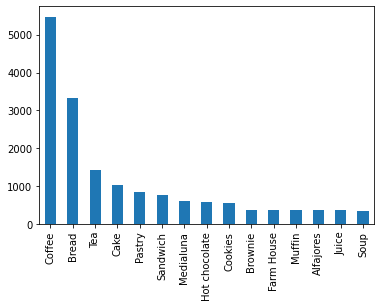

In [7]:
data_cleandate["Item"].value_counts().head(15).plot.bar()

### Al agruparlos por el periodo del dia, se ve que por la tarde es cuando hay mas venta: 

<AxesSubplot:>

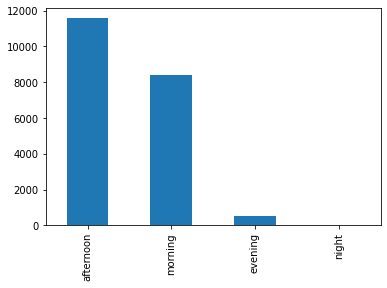

In [8]:
data_cleandate["period_day"].value_counts().plot.bar()

## Gráfica de lineas 
### En este caso podemos usar la base de datos con las ventas diarias para poder visualizar la serie de tiempo de mejor manera:

<AxesSubplot:>

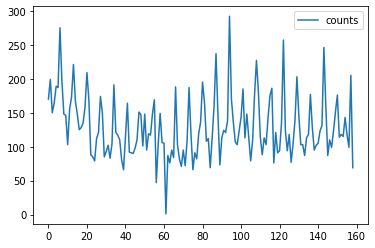

In [9]:
serieVentas.plot.line()

## Histogramas
### Se omitara ya que no se tiene datos ordinales en los que podamos trabajar por intervalos de numero.

## Scatterplot
### Solo se hara el siguiente grafico ya que no se tienen columnas numericas, se separo la hora de la fecha para tener cierta visualizacion en la concentracion de compras por hora:

In [10]:
hour = []
for fecha in data["date_time"]:
    #print(fecha)
    #Para separar hora
    for fechaseparada in fecha.split("-"):
        if len(fechaseparada)>2:
            hourTEMP = fechaseparada.split(" ")[1]
            hour.append(int(hourTEMP.split(":")[0]))

data_cleandate = data_cleandate.assign(hour = hour)
data_cleandate

,Transaction,Item,date_time,period_day,weekday_weekend,clean_date,year,month,day,hour
0,1,Bread,30-10-2016 09:58,morning,weekend,2016-10-30,2016,10,30,9
1,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,2016,10,30,10
2,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30,2016,10,30,10
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,2016-10-30,2016,10,30,10
4,3,Jam,30-10-2016 10:07,morning,weekend,2016-10-30,2016,10,30,10
...,...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend,2017-04-09,2017,04,09,14
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend,2017-04-09,2017,04,09,14
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend,2017-04-09,2017,04,09,14
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend,2017-04-09,2017,04,09,14


<AxesSubplot:xlabel='hour', ylabel='Transaction'>

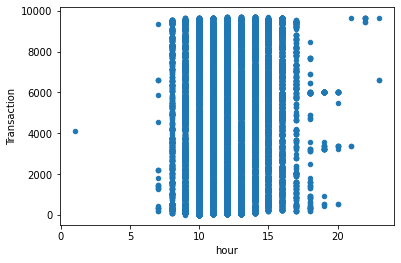

In [11]:
data_cleandate.plot.scatter(x="hour",y="Transaction")

### Se prefiere la siguiente porque asi se puede apreciar mejor la concentracion:

<AxesSubplot:xlabel='hour', ylabel='Transaction'>

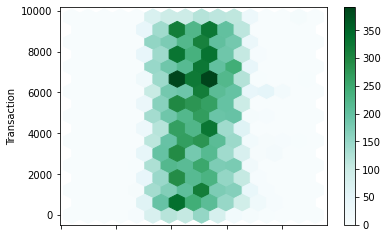

In [12]:
data_cleandate.plot.hexbin(x="hour",y="Transaction", gridsize=15)

## Stacked plots
### Este nos ayuda a comparar no solo la diferencia de ventas en los tiempos en el dia, si no a comparar tambien el total de ventas separados por entre semana y fin de semana:

<AxesSubplot:xlabel='weekday_weekend'>

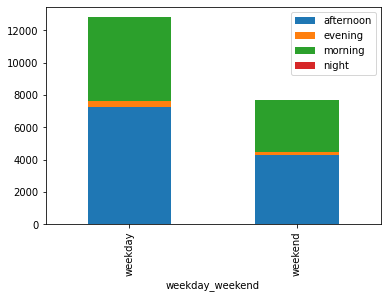

In [13]:
pd.DataFrame(data_cleandate.pivot_table(index="weekday_weekend", columns="period_day", aggfunc="size", fill_value=0), columns = ["weekday_weekend","afternoon","evening","morning","night"])[["afternoon","evening","morning","night"]].plot.bar(stacked = True)
#replace(['afternoon','evening','morning','night','weekday','weekend'],[1,2,0,3,1,2])

### Con este es evidente las ventas totales entre semana superan al fin pero son parecidas:

<AxesSubplot:xlabel='weekday_weekend'>

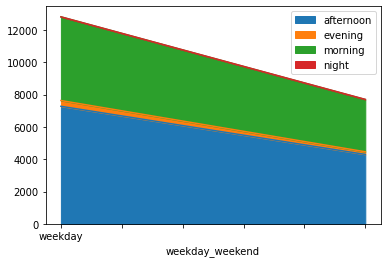

In [14]:
pd.DataFrame(data_cleandate.pivot_table(index="weekday_weekend", columns="period_day", aggfunc="size", fill_value=0), columns = ["weekday_weekend","afternoon","evening","morning","night"])[["afternoon","evening","morning","night"]].plot.area()

### Aqui se hace el comparativo pero separados por periodo del dia:
### (Las separaciones son mañana, tarde, atardecer y noche pero fueron cambiados a numeros para poder ordenarlos)

<AxesSubplot:xlabel='period_day'>

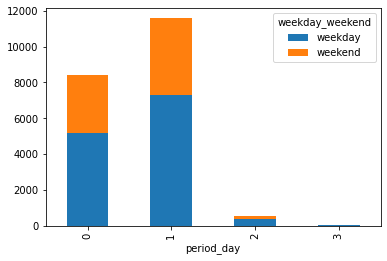

In [15]:
pd.DataFrame(data_cleandate.replace(['afternoon','evening','morning','night'],[1,2,0,3]).pivot_table(index="period_day", columns="weekday_weekend", aggfunc="size", fill_value=0))[ ["weekday","weekend"]].plot.bar(stacked = True)
#data_cleandate.replace(['afternoon','evening','morning','night'],[1,2,0,3]).pivot_table(index="period_day", columns="weekday_weekend", aggfunc="size", fill_value=0)
#replace(['afternoon','evening','morning','night','weekday','weekend'],[1,2,0,3,1,2])
#data_cleandate.pivot_table(index="period_day", columns="weekday_weekend", aggfunc="size", fill_value=0)

### Con este es mas evidente las horas en las que las ventas son mayores:

<AxesSubplot:xlabel='period_day'>

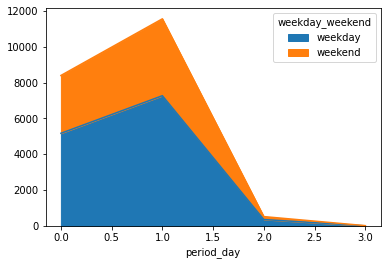

In [16]:
pd.DataFrame(data_cleandate.replace(['afternoon','evening','morning','night'],[1,2,0,3]).pivot_table(index="period_day", columns="weekday_weekend", aggfunc="size", fill_value=0))[ ["weekday","weekend"]].plot.area()


## Boxplot

In [17]:
import seaborn as sns

### Se puede visualizar la concentracion de los datos entre semana y fin de semana de acuerdo a su hora. En la cual podemos ver que la concentracion de ventas es entre las 9 y 15 horas:

<AxesSubplot:xlabel='weekday_weekend', ylabel='hour'>

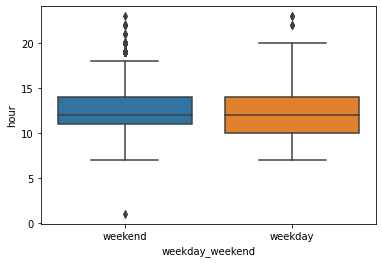

In [ ]:
sns.boxplot(x="weekday_weekend", y= "hour", data = data_cleandate)

<AxesSubplot:xlabel='weekday_weekend', ylabel='hour'>

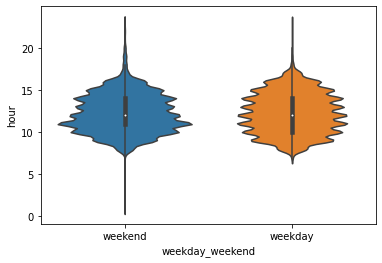

In [ ]:
sns.violinplot(x="weekday_weekend", y= "hour", data = data_cleandate)

## Pie chart COMPARACION

### En la siguiente podemos comparar los mismos datos, solo que de forma distinta. En las barras podemos distinguir el periodo de dia donde mas se vende junto con su frecuencia pero en la grafica de pastel, solo de puede observar la proporcion total:

In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

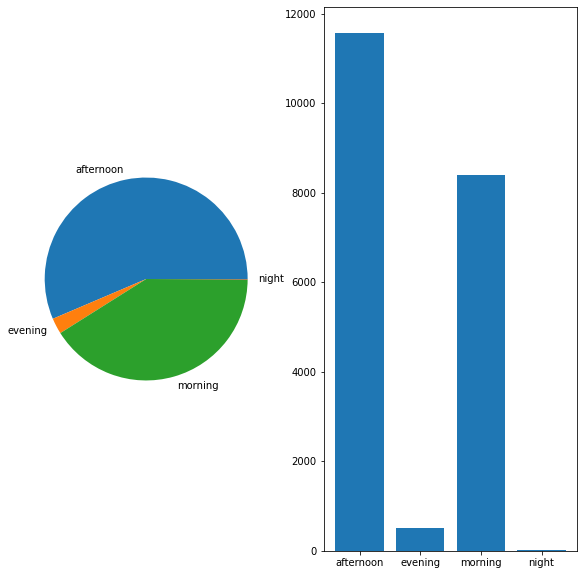

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
piedata = data_cleandate.groupby(by = "period_day").size().reset_index(name='counts')
ax1.pie(piedata["counts"],labels = piedata["period_day"])

bardata= data_cleandate.groupby(by ="period_day").size().reset_index(name='counts')
ax2.bar(bardata["period_day"],bardata["counts"])


# Base de datos Secundaria
### Título de la base : Equity Residential Apartment Data
### URL : https://www.kaggle.com/jackogozaly/equity-residential-apartment-data

## Abriendo la base de datos 

In [18]:
datos = pd.read_csv("apartamentos.csv")

## Definiendo el dataset


In [19]:
df=pd.DataFrame(datos)
df

,Unnamed: 0,Price,Beds,Baths,sq.ft,Floor,Move_in_date,building_id,unit_id,URL,...,Fireplace,City_Skyline,Kitchen_Island,Stainless_Appliances,Renovated,Office_Space,Days_Till_Available,Day_of_the_week_recorded,Unique_ID,Estiamted_Vacancy
0,1,2377,0,1.0,523,5,2021-09-02,01,0507,https://www.equityapartments.com/washington-dc...,...,0.0,0.0,0.0,1.0,1.0,0.0,47.0,Wednesday,0105071210MassApartments,0.020833
1,2,2816,1,1.0,713,2,2021-09-13,01,0204,https://www.equityapartments.com/washington-dc...,...,0.0,0.0,0.0,1.0,1.0,0.0,58.0,Wednesday,0102041210MassApartments,0.020833
2,3,3811,2,2.0,1252,6,2021-10-08,01,0608,https://www.equityapartments.com/washington-dc...,...,1.0,0.0,0.0,0.0,0.0,0.0,83.0,Wednesday,0106081210MassApartments,0.020833
3,4,1549,0,1.0,456,2,2021-09-17,1,256 \r\n,https://www.equityapartments.com/washington-dc...,...,0.0,0.0,0.0,0.0,0.0,0.0,62.0,Wednesday,1256\r\n1500MassApartments,0.003597
4,5,1753,1,1.0,580,3,2021-10-05,1,337 \r\n,https://www.equityapartments.com/washington-dc...,...,0.0,0.0,0.0,0.0,0.0,0.0,80.0,Wednesday,1337\r\n1500MassApartments,0.003597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62805,62806,3062,2,2.0,1203,6,2021-06-29,NaN,NaN,https://www.equityapartments.com/arlington/cou...,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,Sunday,NaN,0.032828
62806,62807,3150,2,2.0,1203,5,2021-07-17,NaN,NaN,https://www.equityapartments.com/arlington/cou...,...,0.0,0.0,0.0,0.0,0.0,0.0,31.0,Sunday,NaN,0.032828
62807,62808,3154,2,2.0,1080,19,2021-07-27,NaN,NaN,https://www.equityapartments.com/arlington/cou...,...,0.0,0.0,0.0,0.0,0.0,0.0,41.0,Sunday,NaN,0.032828
62808,62809,3158,2,2.0,1209,7,2021-08-21,NaN,NaN,https://www.equityapartments.com/arlington/cou...,...,0.0,0.0,0.0,0.0,0.0,0.0,66.0,Sunday,NaN,0.032828


# Estadística básica 
- ### Precio

In [4]:
a=df['Price'].mean()
b=df['Price'].std()
c=df['Price'].max()

print(f"Media : {a}\nDesviación estándar : {b}\nMáximo : {c}")

Media : 3003.8792867377806
Desviación estándar : 1023.9202881707929
Máximo : 12091


### Se aprecia que en la base de datos, el precio promedio por apartamento es de $ 3003.90, con una desviación estándar de $1023.92. Contando con un precio máximo de $12,091.00

- ### Baños y camas

In [5]:
a=df['Baths'].mean()
b=df['Beds'].mean()

print(f"Media de baños : {a}\nMedia de camas : {b}")


Media de baños : 1.3569336092978825
Media de camas : 1.2912911956694795


### Estos datos reflejan que en promedio los departamentos mostrados en la base de datos tienen en promedio una cama y un baño

- ### Tamaño (ft)

In [6]:
a=df["sq.ft"].mean()
b=df["sq.ft"].std()
c=df["sq.ft"].min()
d=df["sq.ft"].max()

print(f"Media : {a}\nDesviación estándar : {b}\nRango : {d-c}")

Media : 846.9058270975959
Desviación estándar : 250.3592279068098
Rango : 1707


### En promedio los apartamentos cuentan con 846.90 ft^2, con una desviación estándar de 250 ft^2 contando con un rango de tamaños de 1707 ft^2

- ### Piso

In [7]:
a=df["Floor"].mean()
b=df["Floor"].std()

print(f"Media : {a}\nDesviación estándar : {b}")


Media : 6.417736029294698
Desviación estándar : 7.287391483925762


### Con esto se puede deducir que en promedio los apartamentos se encuentran en el 6to piso con una desviación grande de 7 pisos 



## Correlación

In [8]:
df.corr()

,Unnamed: 0,Price,Beds,Baths,sq.ft,Floor,Units,Northern_Exposure,Southern_Exposure,Eastern_Exposure,...,Balcony,Walk_In_Closet,Fireplace,City_Skyline,Kitchen_Island,Stainless_Appliances,Renovated,Office_Space,Days_Till_Available,Estiamted_Vacancy
Unnamed: 0,1.000000,-0.080582,-0.006529,-0.013303,-0.004128,-0.015512,0.020827,-0.037076,-0.026757,-0.029394,...,-0.008238,-0.024444,-0.007874,-0.000929,-0.004404,-0.019078,-0.019004,0.006712,0.004891,-0.035243
Price,-0.080582,1.000000,0.453953,0.455451,0.505921,0.375788,-0.113648,0.076524,0.034644,0.050940,...,-0.008306,0.175117,-0.065119,-0.016931,0.007746,0.010724,-0.067820,0.066430,0.035980,0.149306
Beds,-0.006529,0.453953,1.000000,0.817480,0.860518,-0.154496,-0.003340,0.026270,0.064772,0.035308,...,0.057561,0.038665,0.182757,-0.032544,0.045051,0.007203,0.048198,0.029149,0.045685,0.076259
Baths,-0.013303,0.455451,0.817480,1.000000,0.816796,-0.067360,-0.027588,0.052865,0.053773,0.029560,...,0.033975,0.067195,0.173251,-0.004587,0.038600,0.004611,0.023383,0.065794,0.037655,0.051565
sq.ft,-0.004128,0.505921,0.860518,0.816796,1.000000,-0.068531,0.055204,0.052236,0.054070,0.042012,...,0.095753,0.071771,0.158775,-0.036503,0.052954,0.078646,-0.006736,0.160487,0.061919,0.095826
Floor,-0.015512,0.375788,-0.154496,-0.067360,-0.068531,1.000000,0.075808,0.036828,-0.032135,0.022917,...,-0.056478,0.054107,-0.149739,0.082955,-0.030759,0.075166,-0.099385,-0.033769,0.086283,0.115466
Units,0.020827,-0.113648,-0.003340,-0.027588,0.055204,0.075808,1.000000,0.036888,-0.002224,0.058304,...,0.042611,-0.002169,0.062090,-0.035018,0.041869,0.015984,0.045769,0.034336,0.041672,-0.242157
Northern_Exposure,-0.037076,0.076524,0.026270,0.052865,0.052236,0.036828,0.036888,1.000000,-0.217175,0.020221,...,-0.016794,0.026850,0.050418,-0.054405,-0.005762,0.092127,0.053139,0.060144,0.088952,-0.049120
Southern_Exposure,-0.026757,0.034644,0.064772,0.053773,0.054070,-0.032135,-0.002224,-0.217175,1.000000,0.011915,...,0.005950,0.037769,0.017516,-0.053173,0.021698,0.042491,0.031852,0.005436,0.065863,-0.045574
Eastern_Exposure,-0.029394,0.050940,0.035308,0.029560,0.042012,0.022917,0.058304,0.020221,0.011915,1.000000,...,0.017351,-0.011855,0.054081,-0.026287,-0.031840,0.054422,0.078307,0.030376,0.024883,-0.094952


### En la tabla anterior se aprecia que el precio tiene una correlación significativa con el : 
- ### Número de camas
- ### Número de baños
- ### Tamaño del apartamento 
- ### Piso en el que se encuentra

In [9]:
import matplotlib as plt

# Gráficas

## Gráfica de barras y datos categoricos

- ### Ciudad

<AxesSubplot:>

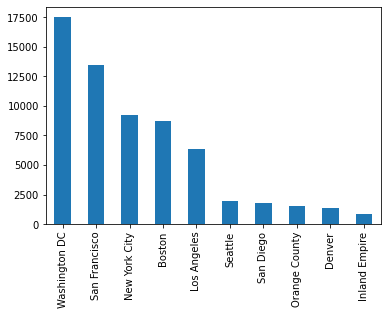

In [10]:
datos["City"].value_counts().plot.bar()

### Las ciudades con mayor oferta de apartamentos son Washington DC, San Francisco, Nueva York, Boston y Los Angeles

- ### Amenidades

<AxesSubplot:>

C:\Users\thali\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thali\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


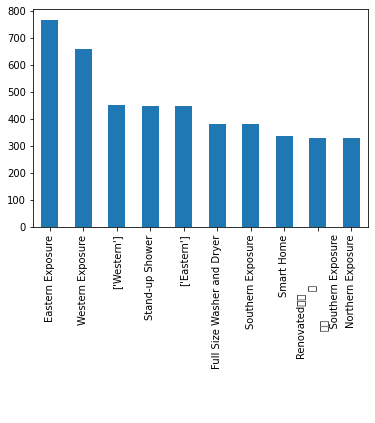

In [11]:
datos["Amenity"].value_counts().head(10).plot.bar()

### Las amenidades más comunes en los apartamentos son la exposición del sur y la exposición del norte, que hace referencia a las zonas por las cuales se tiene exposición del sol en el apartamento.

## Gráfica de líneas

<AxesSubplot:>

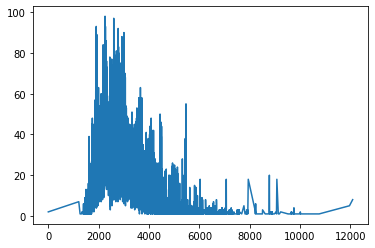

In [12]:
datos["Price"].value_counts().sort_index().plot.line()

### En esta gráfica se puede confirmar la parte de estadística básica, ya que se puede apreciar que la variablididad de los precios es grande y que la mayoría de los precios se encuentran entre $1.500 - $4,000

## Histogramas

- ### Precios mayores al promedio

<AxesSubplot:ylabel='Frequency'>

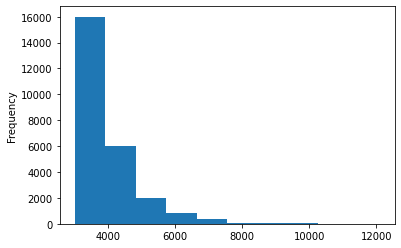

In [13]:
datos[datos["Price"]>3003.90]["Price"].plot.hist()

- ### Precios menores al promedio

<AxesSubplot:ylabel='Frequency'>

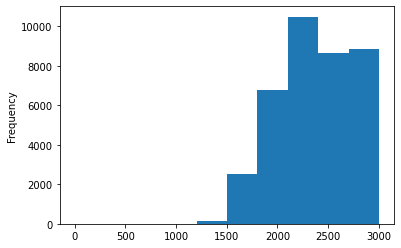

In [14]:
datos[datos["Price"]<3003.90]["Price"].plot.hist()

### Por lo tanto se puede ver facilmente que se tiene un mayor número de apartamentos que tienen un precio menor al precio promedio

- ### Tamaño mayor al promedio


<AxesSubplot:ylabel='Frequency'>

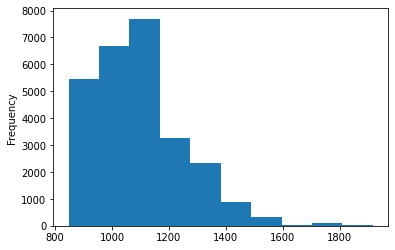

In [15]:
datos[datos["sq.ft"]>846.90]["sq.ft"].plot.hist()

- ### Tamaño menor al promedio

<AxesSubplot:ylabel='Frequency'>

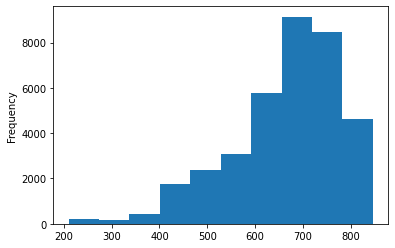

In [16]:
datos[datos["sq.ft"]<846.90]["sq.ft"].plot.hist()

### En cuanto al tamaño del apartamento, los apartamentos mayores al promedio son una cantidad parecida a los que son más chicos, pero se puede ver que se tienen mayor número de apartamentos más chicos que el promedio

## Scatter plot

### En esta sección se gráficará la dispersión de los datos que se tienen una mayor correlación con el precio

- ### Precio vs Número de camas

<AxesSubplot:xlabel='Price', ylabel='Beds'>

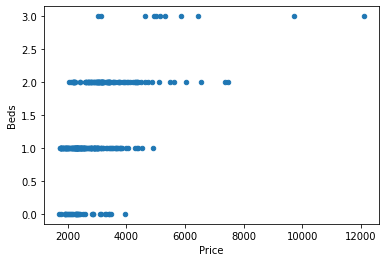

In [17]:
datos[datos["Price"]>0].sample(300).plot.scatter(x="Price",y="Beds")

### El precio y el número de baños tienen una ligera relación directa 

- ### Precio vs Número de baños


<AxesSubplot:xlabel='Price', ylabel='Baths'>

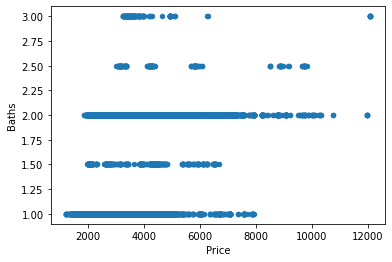

In [18]:
datos[datos["Price"]>0].plot.scatter(x="Price",y="Baths")

### El precio y el número de baños tienen también una relación directa ligera

- ### Precio vs Piso 

<AxesSubplot:xlabel='Price', ylabel='Floor'>

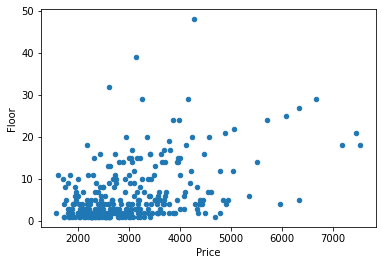

In [19]:
datos[datos["Price"]>0].sample(300).plot.scatter(x="Price",y="Floor")

### El precio y el piso del apartamento parecen tener una relación directa más visible

- ### Precio vs Tamaño

<AxesSubplot:xlabel='Price', ylabel='sq.ft'>

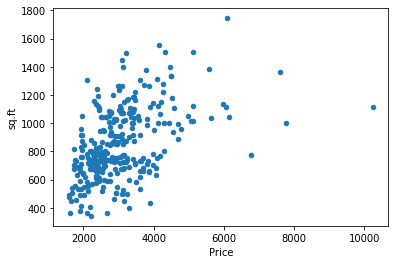

In [20]:
datos[datos["Price"]>0].sample(300).plot.scatter(x="Price",y="sq.ft")

### El precio y el tamaño del apartamento también cuentan con una relación directa más clara

## Box plots

### Caja y bigotes

<AxesSubplot:xlabel='City', ylabel='Price'>

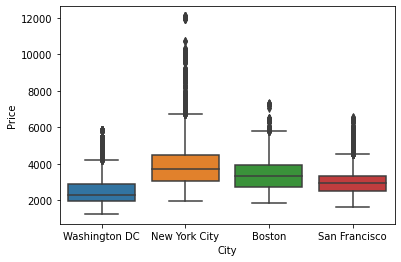

In [29]:
df = datos[datos.City.isin(datos.City.value_counts().head(4).index)]

sns.boxplot(
    x='City',
    y='Price',
    data=df
)

### En el precio por ciudad se encuentran varios puntos atípicos, la variación de precios en cada ciudad es muy parecida

### Violín

<AxesSubplot:xlabel='City', ylabel='Price'>

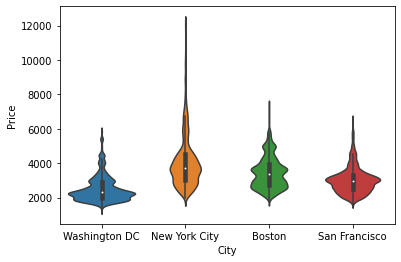

In [31]:
sns.violinplot(
    x='City',
    y='Price',
    data=datos[datos.City.isin(datos.City.value_counts()[:4].index)]
)

## Gráficas multivariantes


In [ ]:
import matplotlib.pyplot as plt

### Mapa de correlación

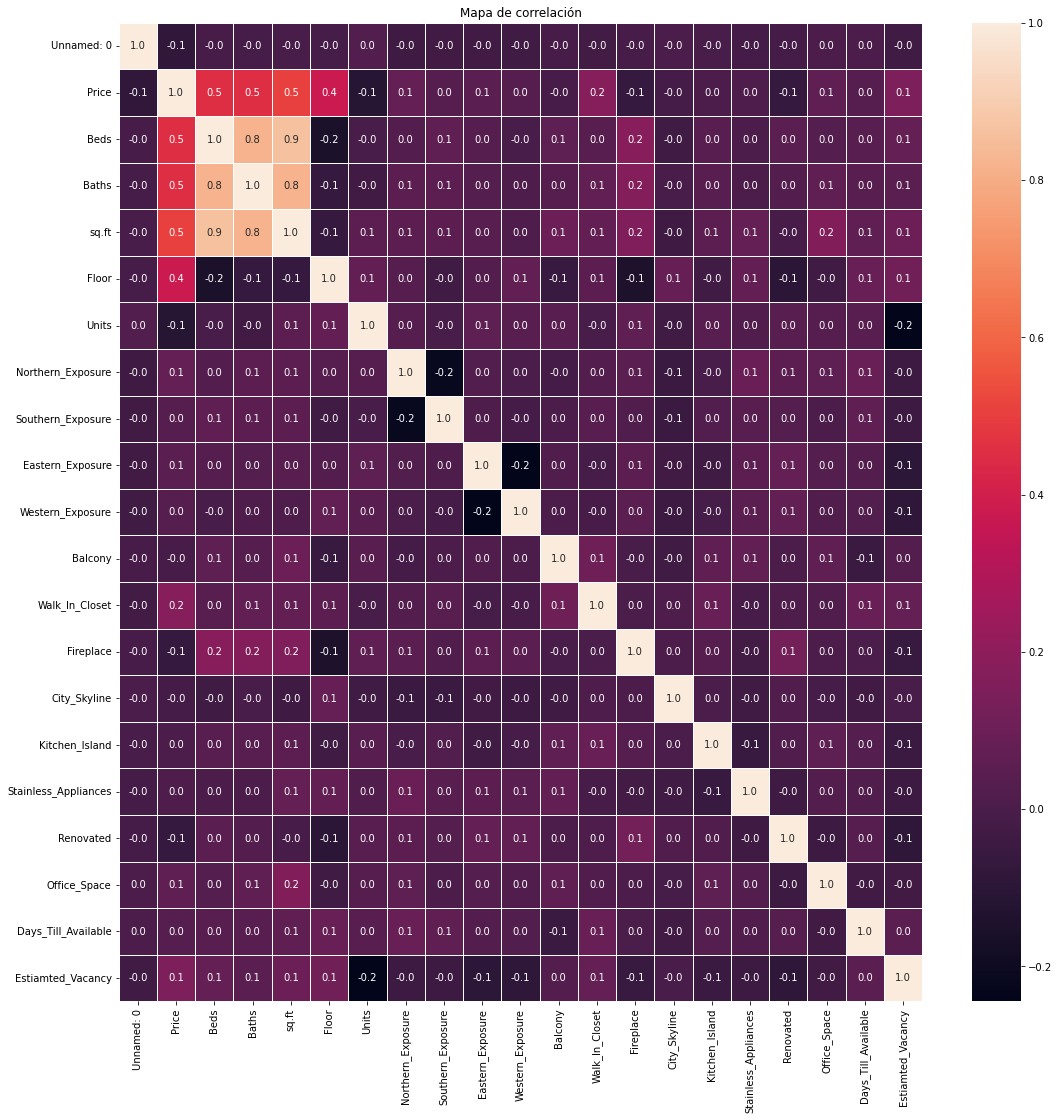

In [ ]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.show()

### Así verificando de forma visual como los datos que se usaron para los gráficos de dispersión son los que tienen mayor relación con el precio de los apartamentos